# Data-analyysin osaaja

# Koulutus: 21.11.-22.11.2019

# Aihe: Epälineaarinen regressio

Käsittelemme nyt esimerkinomaisesti epälineaarista regressiota. Luomme ensin keintekoista dataa, jossa epälineaarinen yhteys syötteen x ja vasteen y välillä. Sitten mallinnamme yhteyttä epälineaarisen mallina avulla. Esimerkkimallina käytämme tukivektorikonetta (suppot vector machine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR # Tukivektorikoneen kirjastototeutus

In [3]:
# Luodaan keinotekoista dataa, jossa epälineaarinen yhteys
x = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(x) + 0.2*np.random.rand(100,1) # mukana mittauskohinaa (epätarkat mittaukset)

In [4]:
x.shape

(100, 1)

In [5]:
y.shape

(100, 1)

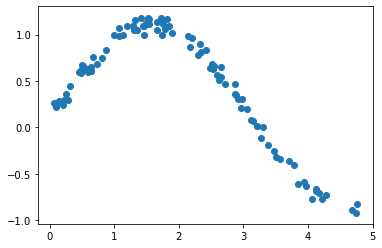

In [6]:
plt.scatter(x,y)

In [7]:
# Luo tukivektorikoneisiin perustuva regressiomalli:

svr_rbf_malli = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
# svr_lin = SVR(kernel='linear', C=100, gamma='auto')

In [8]:
svr_rbf_malli.fit(x,y.ravel())

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
y_pred = svr_rbf_malli.predict(pd.DataFrame(x))

In [10]:
lm = LinearRegression(fit_intercept = True)

In [11]:
lm.fit(pd.DataFrame(x), pd.DataFrame(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred_lm = lm.predict(pd.DataFrame(x))

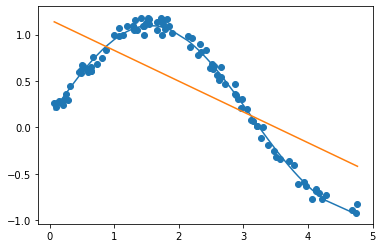

In [13]:
# Datajoukko pisteinä, ennustefunktio viivana
plt.scatter(pd.DataFrame(x),pd.DataFrame(y))
plt.plot(pd.DataFrame(x), pd.DataFrame(y_pred))
plt.plot(pd.DataFrame(x), pd.DataFrame(y_pred_lm))

plt.show()

Tehtävä 1. Toteuta epälineaarinen regressio jollekin muulle datalle

In [14]:
lm.coef_

array([[-0.33185055]])